## Task B: Recall
Veamos el recall por cada característica. Podremos obviar que efectivamente se marque la característica correcta


In [98]:
%load_ext autoreload
%autoreload 2

from hatedetection import load_datasets
import glob
import json

train_dataset, dev_dataset, test_dataset = load_datasets(add_body=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Obs

`text` hace referencia al contexto del tweet del diario
`title` al título de la noticia (extraído del artículo)

In [99]:


evaluations = {
}
for model_name, path in [
    ('none', "../evaluations/betonews_fine_none.json"),   
    ('tweet', "../evaluations/betonews_fine_text.json"),   
    ('tweet+body', "../evaluations/betonews_fine_body.json"),   
    ]:

    with open(path) as f:
        evaluations[model_name] = json.load(f)

for key, evals in evaluations.items():
    print(f"We have {len(evals['metrics'])} {key} evaluations")


We have 10 none evaluations
We have 10 tweet evaluations
We have 15 tweet+body evaluations


In [100]:
import numpy as np
from hatedetection import extended_hate_categories

df = test_dataset.to_pandas().set_index("id")
df["HATEFUL"] = df[extended_hate_categories].any(1)

# for key in evaluations:
#     column_names = [f"{key}_{x}_pred" for x in extended_hate_categories]

#     df[column_names] = (np.array(evaluations[key]["predictions"]) > 0).mean(0)
#     df[f"{key}_HATEFUL_pred"] = df[column_names].any(1)

df

,title,text,article_text,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
id,,,,,,,,,,,,,,
397703,Mora Godoy cierra su escuela de tango y remata...,@usuario Ojalá se funda y cague de hambre,Mora Godoy cierra su escuela de tango y remata...,False,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,True,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,0,0,0,0,0
397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,False,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,False,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,False,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361071,Nahir Galarza sumó a una abogada feminista a s...,@usuario Con esa varita q no rompe un plato ni...,Nahir Galarza sumó a una abogada feminista a s...,False,"La defensa de Nahir Galarza, condenada el 3 de...",0,0,0,0,0,0,0,0,0
361072,Nahir Galarza sumó a una abogada feminista a s...,@usuario No las entiendo a estas pelotudas. So...,Nahir Galarza sumó a una abogada feminista a s...,True,"La defensa de Nahir Galarza, condenada el 3 de...",0,1,0,0,0,0,0,0,0
361073,Nahir Galarza sumó a una abogada feminista a s...,@usuario Lo mató por qué es macho!,Nahir Galarza sumó a una abogada feminista a s...,False,"La defensa de Nahir Galarza, condenada el 3 de...",0,0,0,0,0,0,0,0,0


## RECALL exacto

In [101]:
hate_categories, extended_hate_categories

(['WOMEN',
  'LGBTI',
  'RACISM',
  'CLASS',
  'POLITICS',
  'DISABLED',
  'APPEARANCE',
  'CRIMINAL'],
 ['CALLS',
  'WOMEN',
  'LGBTI',
  'RACISM',
  'CLASS',
  'POLITICS',
  'DISABLED',
  'APPEARANCE',
  'CRIMINAL'])

In [102]:
import pandas as pd
from hatedetection import hate_categories
from sklearn.metrics import recall_score

data = []
for context in evaluations:
    print(context)
    for prediction in evaluations[context]["predictions"]:
        df_pred = pd.DataFrame(prediction, columns=extended_hate_categories) > 0
        df_pred["HATEFUL"] = df_pred[extended_hate_categories].any(1)
        for characteristic in hate_categories:
            data.append({
                "context": context,
                "characteristic": characteristic,
                "recall": recall_score(df[characteristic], df_pred[characteristic])
            })

recall_df = pd.DataFrame(data)

recall_df

none
tweet
tweet+body


,context,characteristic,recall
0,none,WOMEN,0.283088
1,none,LGBTI,0.276923
2,none,RACISM,0.643299
3,none,CLASS,0.370861
4,none,POLITICS,0.529210
...,...,...,...
275,tweet+body,CLASS,0.463576
276,tweet+body,POLITICS,0.573883
277,tweet+body,DISABLED,0.581395
278,tweet+body,APPEARANCE,0.704485


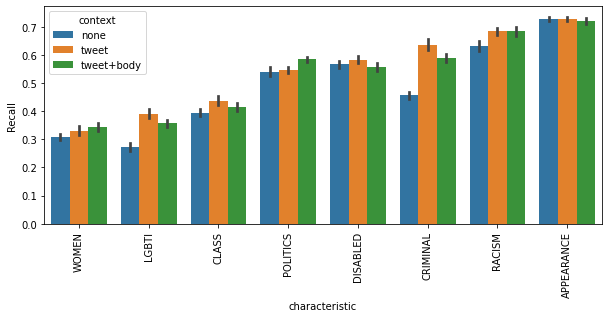

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
x_order = recall_df[recall_df.context == "tweet"].groupby("characteristic").mean().sort_values("recall").index

figsize = (10, 4)

plt.figure(figsize=figsize)

sns.barplot(x="characteristic", y="recall", hue="context", data=recall_df, order=x_order)

plt.ylabel("Recall")
plt.xticks(rotation=90);
plt.savefig("imgs/exact_recall_barplot.pdf", bbox_inches="tight")

## REcall no exacto

none
tweet
tweet+body


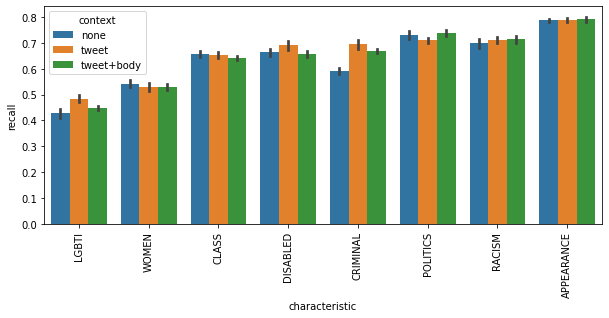

In [108]:
import pandas as pd
from hatedetection import hate_categories
from sklearn.metrics import recall_score

data = []
for context in evaluations:
    print(context)
    for prediction in evaluations[context]["predictions"]:
        df_pred = pd.DataFrame(prediction, columns=extended_hate_categories) > 0
        df_pred["HATEFUL"] = df_pred[extended_hate_categories].any(1)
        for characteristic in hate_categories:
            data.append({
                "context": context,
                "characteristic": characteristic,
                "recall": recall_score(df[characteristic], df_pred["HATEFUL"])
            })

recall_df = pd.DataFrame(data)

x_order = recall_df[recall_df.context == "tweet"].groupby("characteristic").mean().sort_values("recall").index

plt.figure(figsize=figsize)
plt.ylabel("Recall")



sns.barplot(x="characteristic", y="recall", hue="context", data=recall_df, order=x_order)

plt.xticks(rotation=90);
plt.savefig("imgs/hate_recall_barplot.pdf", bbox_inches="tight")

none
tweet
tweet+body


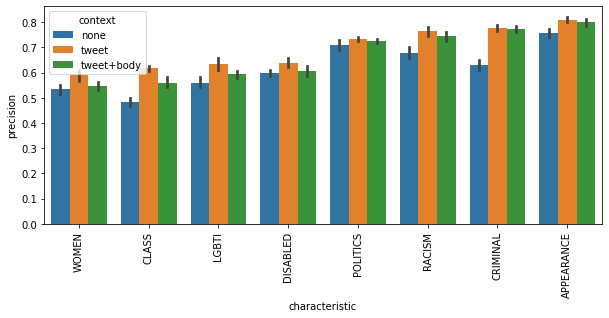

In [109]:
import pandas as pd
from hatedetection import hate_categories
from sklearn.metrics import precision_score

data = []
for context in evaluations:
    print(context)
    for prediction in evaluations[context]["predictions"]:
        df_pred = pd.DataFrame(prediction, columns=extended_hate_categories) > 0
        df_pred["HATEFUL"] = df_pred[extended_hate_categories].any(1)
        for characteristic in hate_categories:
            data.append({
                "context": context,
                "characteristic": characteristic,
                "precision": precision_score(df[characteristic], df_pred[characteristic])
            })

precision_df = pd.DataFrame(data)

x_order = precision_df[precision_df.context == "tweet"].groupby("characteristic").mean().sort_values("precision").index

plt.figure(figsize=figsize)
plt.ylabel("precision")



sns.barplot(x="characteristic", y="precision", hue="context", data=precision_df, order=x_order)

plt.xticks(rotation=90);
plt.savefig("imgs/precision_barplot.pdf", bbox_inches="tight")
